# A simple example, solved two ways

1. QSS
2. CVXPY w/ defaults

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from time import time
import seaborn as sns
import cvxpy as cvx
sns.set_style('darkgrid')
import sys
sys.path.append('/Users/bennetmeyers/Documents/Boyd-work/optimal-signal-demixing/')

In [3]:
from gfosd import Problem 
from gfosd.components import *

## Data generation

In [4]:
np.random.seed(42)
t = np.linspace(0, 1000, 200)
signal1 = np.sin(2 * np.pi * t * 1 / (500.))
signal2 = signal.square(2 * np.pi * t * 1 / (450.))
X_real = np.zeros((3, len(t)), dtype=float)
X_real[0] = 0.15 * np.random.randn(len(signal1))
X_real[1] = signal1
X_real[2] = signal2
y = np.sum(X_real, axis=0)
K, T = X_real.shape

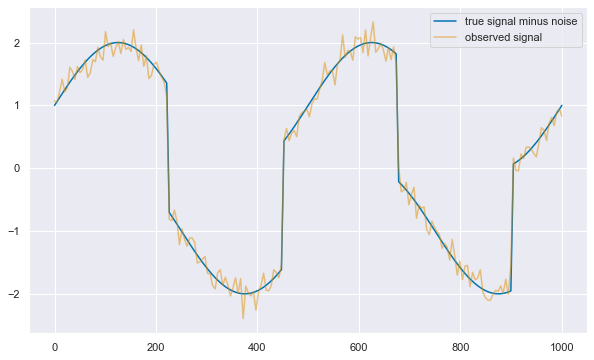

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sum(X_real[1:], axis=0), label='true signal minus noise')
plt.plot(t, y, alpha=0.5, label='observed signal')
plt.legend()
plt.show()

# Problem definition

In [6]:
c1 = SumSquare(weight=1/len(y))
c2 = SumSquare(weight=1, diff=2)
c3 = FiniteSet(values={-1, 1})
components = [c1, c2, c3]

problem = Problem(y, components)

## Solve with QSS, using defaults

In [7]:
problem.decompose(verbose=True)
print('\nobjective value: {:.4e}'.format(problem.objective_value))

---------------------------------------------------------------
              QSS: the Quadratic-Separable Solver              
                     author: Luke Volpatti                     
---------------------------------------------------------------

### Preconditioning finished in 0.011677980422973633 seconds. ###
### Factorization finished in 0.005095958709716797 seconds. ###
 #####     Beginning ADMM solve     #####
---------------------------------------------------------------
 iter | objective | primal res | dual res |   rho   | time (s) 
---------------------------------------------------------------
    1 | 1.74e-01    9.83e-01     1.00e-01   1.00e-01  1.28e-03
   20 | 9.59e-03    1.08e-04     2.62e-05   1.00e-01  8.65e-03
---------------------------------------------------------------
Average 0.00043910741806030273 seconds per iteration
Refactored 0 times.
Spent total 0 seconds refactorizing.
Total solve time 0.02623891830444336 seconds.

objective value: 9.5950e-03


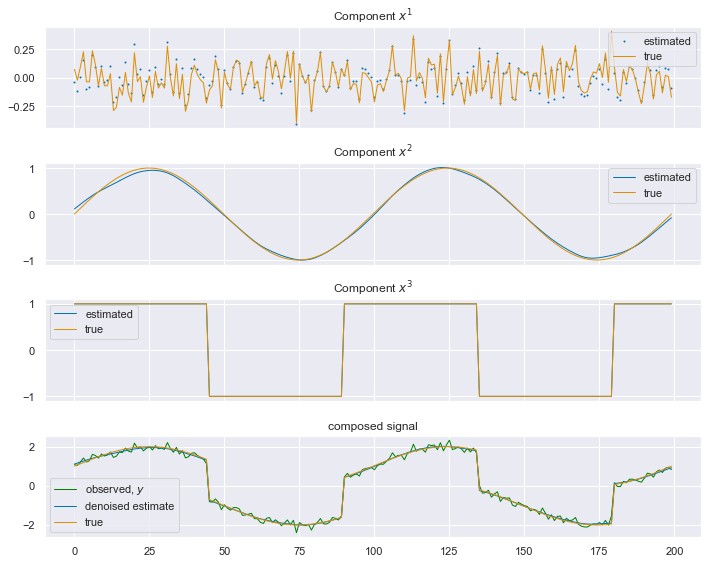

In [8]:
problem.plot_decomposition(X_real=X_real);

## Solve with CVXPY

Fails gracefuly

In [9]:
problem.decompose(solver='cvx', verbose=True)
print(problem.objective_value)

Problem is non-convex and is not solvable with CVXPY.
Please try QSS.
None


In [10]:
problem.plot_decomposition(X_real=X_real);

No decomposition available.
